In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [45]:
df = pd.read_csv('bike_buyers_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   Marital Status    1000 non-null   object
 2   Gender            1000 non-null   object
 3   Income            1000 non-null   int64 
 4   Children          1000 non-null   int64 
 5   Education         1000 non-null   object
 6   Occupation        1000 non-null   object
 7   Home Owner        1000 non-null   object
 8   Cars              1000 non-null   int64 
 9   Commute Distance  1000 non-null   object
 10  Region            1000 non-null   object
 11  Age               1000 non-null   int64 
 12  Purchased Bike    1000 non-null   object
dtypes: int64(5), object(8)
memory usage: 101.7+ KB


In [46]:
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56140.000000,1.908000,1.452000,44.190000
std,5347.333948,31081.609779,1.626094,1.124705,11.353537
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [47]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


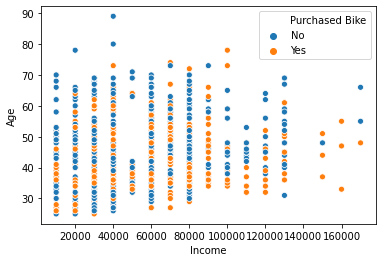

In [48]:
sns.scatterplot(data=df, x="Income", y="Age", hue='Purchased Bike')

In [49]:
df['Purchased Bike'] = df['Purchased Bike'].map({'No': 0, 'Yes':1})
df['Home Owner'] = df['Home Owner'].map({'No': 0, 'Yes':1})
df['Marital Status'] = df['Marital Status'].map({'Single': 0, 'Married':1})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female':1})


    

In [50]:
df

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,1,1,40000,1,Bachelors,Skilled Manual,1,0,0-1 Miles,Europe,42,0
1,24107,1,0,30000,3,Partial College,Clerical,1,1,0-1 Miles,Europe,43,0
2,14177,1,0,80000,5,Partial College,Professional,0,2,2-5 Miles,Europe,60,0
3,24381,0,0,70000,0,Bachelors,Professional,1,1,5-10 Miles,Pacific,41,1
4,25597,0,0,30000,0,Bachelors,Clerical,0,0,0-1 Miles,Europe,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,1,0,60000,2,High School,Professional,1,2,2-5 Miles,North America,54,1
996,28672,0,0,70000,4,Graduate Degree,Professional,1,0,2-5 Miles,North America,35,1
997,11809,1,0,60000,2,Bachelors,Skilled Manual,1,0,0-1 Miles,North America,38,1
998,19664,0,0,100000,3,Bachelors,Management,0,3,1-2 Miles,North America,38,0


In [51]:
df_buyers = df.groupby(df['Purchased Bike'])
df_buyers.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,1,1,40000,1,Bachelors,Skilled Manual,1,0,0-1 Miles,Europe,42,0
1,24107,1,0,30000,3,Partial College,Clerical,1,1,0-1 Miles,Europe,43,0
2,14177,1,0,80000,5,Partial College,Professional,0,2,2-5 Miles,Europe,60,0
3,24381,0,0,70000,0,Bachelors,Professional,1,1,5-10 Miles,Pacific,41,1
4,25597,0,0,30000,0,Bachelors,Clerical,0,0,0-1 Miles,Europe,36,1
5,13507,1,1,10000,2,Partial College,Manual,1,0,1-2 Miles,Europe,50,0
6,27974,0,0,160000,2,High School,Management,1,4,0-1 Miles,Pacific,33,1
7,19364,1,0,40000,1,Bachelors,Skilled Manual,1,0,0-1 Miles,Europe,43,1
8,22155,1,0,20000,2,Partial High School,Clerical,1,2,5-10 Miles,Pacific,58,0
9,19280,1,0,20000,2,Partial College,Manual,1,1,0-1 Miles,Europe,48,1


In [52]:
buyers_df = df[df['Purchased Bike'] != 0]
buyers_df

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
3,24381,0,0,70000,0,Bachelors,Professional,1,1,5-10 Miles,Pacific,41,1
4,25597,0,0,30000,0,Bachelors,Clerical,0,0,0-1 Miles,Europe,36,1
6,27974,0,0,160000,2,High School,Management,1,4,0-1 Miles,Pacific,33,1
7,19364,1,0,40000,1,Bachelors,Skilled Manual,1,0,0-1 Miles,Europe,43,1
9,19280,1,0,20000,2,Partial College,Manual,1,1,0-1 Miles,Europe,48,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,11292,0,0,150000,1,Partial College,Professional,0,3,0-1 Miles,North America,44,1
995,23731,1,0,60000,2,High School,Professional,1,2,2-5 Miles,North America,54,1
996,28672,0,0,70000,4,Graduate Degree,Professional,1,0,2-5 Miles,North America,35,1
997,11809,1,0,60000,2,Bachelors,Skilled Manual,1,0,0-1 Miles,North America,38,1


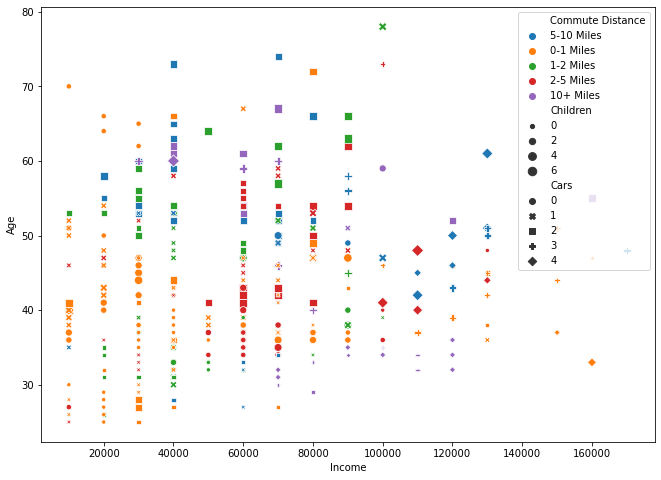

In [53]:
# Exploritory 
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.scatterplot(data=buyers_df, x="Income", y="Age", hue='Commute Distance', style='Cars', size='Children')

In [54]:
feature_cols = ['Marital Status', 'Children', 'Cars', 'Age']

In [55]:
X = buyers_df[feature_cols]
y= buyers_df['Income']

In [56]:
from sklearn.tree import DecisionTreeRegressor

dt_mod1 = DecisionTreeRegressor(random_state = 1)
dt_mod1

DecisionTreeRegressor(random_state=1)

In [57]:

scores = cross_val_score(dt_mod1, X, y, cv = 10, scoring = 'neg_mean_squared_error')

np.mean(np.sqrt(-scores))

26344.145521862596

In [59]:
dt_mod2 = DecisionTreeRegressor(random_state = 1, max_depth = 5)
scores2 = cross_val_score(dt_mod2, X, y, cv = 10, scoring = 'neg_mean_squared_error')
np.mean(np.sqrt(-scores2))

23120.74430504569

In [60]:
max_depth_range = list(range(1, 8))

#list to store the average RMSE for each value of max_depth
RMSE_scores = []

for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth = depth, random_state = 1)
    MSE_scores = cross_val_score(treereg, X, y, cv = 10, scoring = 'neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0, 0.5, 'RMSE')

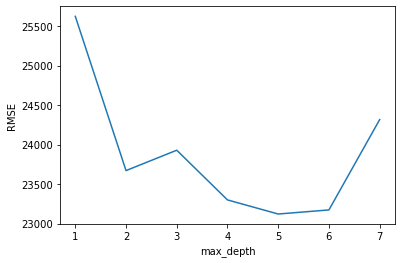

In [61]:

plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE')

In [62]:
dt_mod3 = DecisionTreeRegressor(max_depth = 5, random_state = 1)
dt_mod3.fit(X, y)

DecisionTreeRegressor(max_depth=5, random_state=1)

In [63]:
pd.DataFrame({'feature' : feature_cols, 'importance': dt_mod3.feature_importances_})

,feature,importance
0,Marital Status,0.011223
1,Children,0.151183
2,Cars,0.635313
3,Age,0.202280


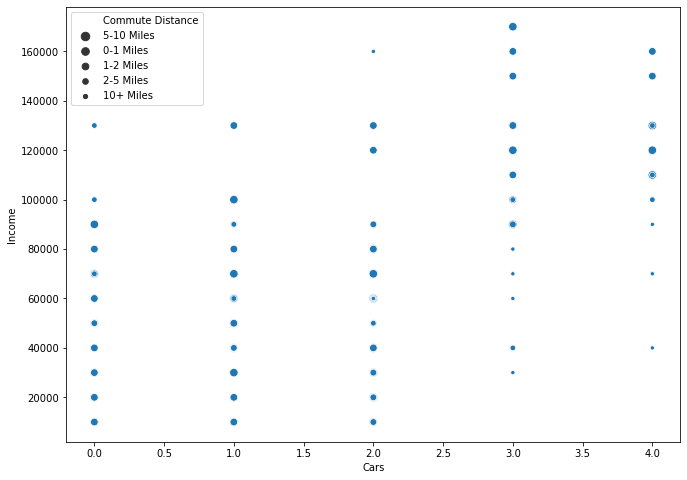

In [68]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.scatterplot(data=buyers_df, x="Cars", y="Income", size="Commute Distance")